# Euler's Method for a First Order Ordinary Differential Equation

One of the simplest models for how a quantity changes with time is a first order ODE like this one for a temperature sensor.

\begin{equation}
\frac{dT_m}{dt}=\dot{T}_m = \frac{(T-T_m)}{\tau}
\end{equation}

where $\tau$ is a time constant representing how quickly things change. Euler's method breaks down the derivative into a simple approximation

\begin{equation}
\frac{\Delta T_m}{\Delta t} = \frac{(T-T_m)}{\tau}
\end{equation}

and rearranges to predict how much $T_m$ will change from it's current state over a short time $\Delta t$

\begin{equation}
\Delta T_m= \frac{(T-T_m)}{\tau} {\Delta t} 
\end{equation}

If we know the old temperature $T_m(old)$ and the ambient temperature $T$, then we can predict the new temperature $T_m(new)$

\begin{equation}
T_m(new) = T_m(old) + \Delta T_m = T_m(old) + \frac{(T-T_m)}{\tau} {\Delta t} 
\end{equation}



In [125]:
# gets all of numpy but you will still need to refer to e.g. numpy.random.randn() as random.randn()
from numpy import *               # all of the array capable elements for numerical data          
from scipy.stats import norm      # comprehensive functions for Gaussian normal distributions
import csv                        # library for reading and writing comma separated value files
from matplotlib.pyplot import *   # all of pyplot to graph the results of our calculations

# put figures inline in the notebook, so you don't have to call show()
%matplotlib inline

# This lets you make the default figure size larger (or smaller)
from IPython.core.pylabtools import figsize
figsize(14, 7)

**Set up the intial conditions**, a time base $t$, and define how the ambient temperature will change with time. Make sure everything is defined at time $t=0$, including the time constant.

In [126]:
n = 100
stepStart = int(n/20)+1
t = linspace(0,100,n)
T = zeros(n)
T[:] = 25
T[:stepStart] = 10
Tm = zeros(n)
Tm[0] = 10
tau = 10
deltat = t[1]-t[0]
ii = 0     # the step we just took

**Go one time step into the future** using the values at the old time, then **do it again**.

In [127]:
dTdt = (T[0]-Tm[0])/tau
Tm[1] = Tm[0] + dTdt * deltat
print(Tm[1])
ii = 1     # the step we just took

10.0


In [128]:
dTdt = (T[1]-Tm[1])/tau
Tm[2] = Tm[1] + dTdt * deltat
print(Tm[2])
ii = 2     # the step we just took

10.0


Run this plot any time to check on the progress of the solution after each step.

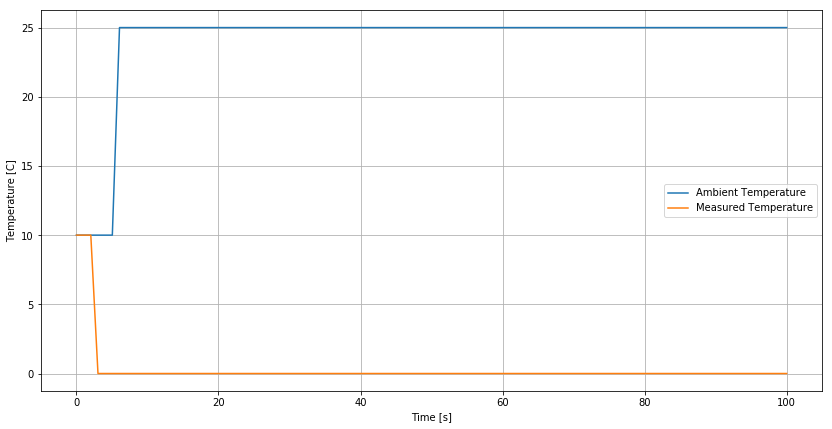

In [129]:
def plotT():
    plot(t,T,label="Ambient Temperature")
    plot(t,Tm,label = 'Measured Temperature')
    grid()
    legend()
    xlabel("Time [s]")
    ylabel('Temperature [C]')
plotT()

This next cell takes us one step further, every time it is run

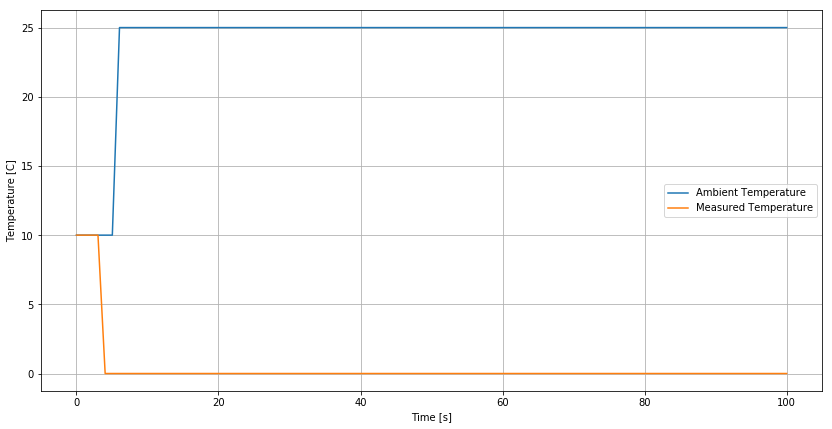

In [130]:
dTdt = (T[ii]-Tm[ii])/tau
Tm[ii+1] = Tm[ii] + dTdt * deltat
ii += 1     # the step we just took
plotT()


Take multiple steps at a time and plot

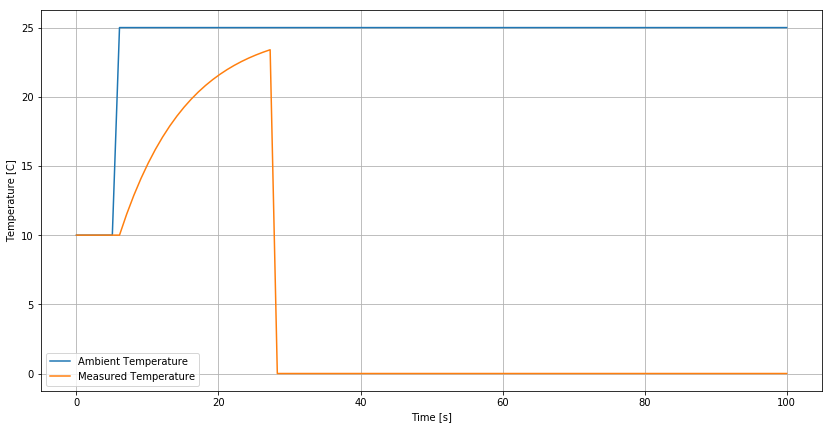

In [135]:
nSteps = int(n/20)+1
for i in range(ii,ii+nSteps):
    Tm[i+1] = Tm[i] + dTdt * deltat
    dTdt = (T[i]-Tm[i])/tau
ii += nSteps
plotT()

Now take all the rest of the steps

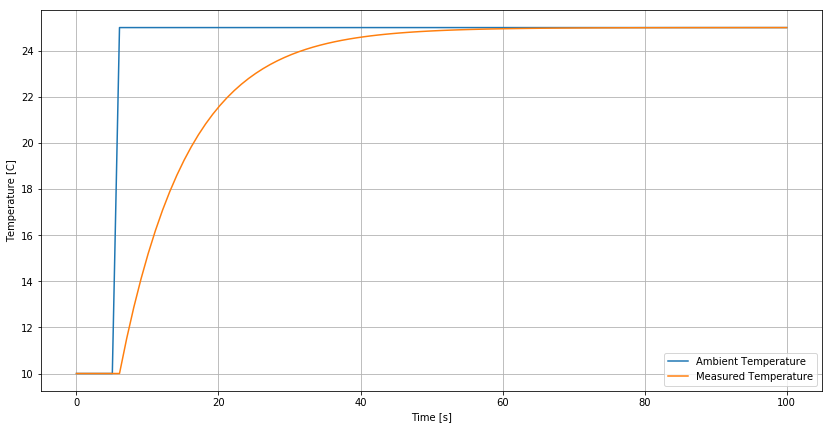

In [137]:
for i in range(ii,n-1):
    dTdt = (T[i]-Tm[i])/tau
    Tm[i+1] = Tm[i] + dTdt * deltat
ii = n-1
plotT()